In [4]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1

In [5]:
# Importing bank_marketing.csv as a dataframe using Pandas
bank = pd.read_csv('bank_marketing.csv', header=0, sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58.0,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44.0,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33.0,unknown,single,unknown,no,1,no,no,NaN,5,may,198,1,-1,0,unknown,no


In [6]:
#number of rows and columns in the bank dataset
bank.shape

(45211, 17)

In [7]:
#type of data in each column 
bank.dtypes

age          float64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
deposit       object
dtype: object

In [8]:
#checking for any redundant data in dataframe 
duplicated_rows = bank.duplicated().sum()
duplicated_rows

0

In [9]:
#describe characteristics 
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,43872.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.924781,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.610835,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## Check for Outliers

The chart above shows that the columns balance, duration, campaign, pdays, and have possible outliers based on the maximum value being significantly higher than the mean in the descriptive table above. 

In [10]:
#create function that finds the number of outliers in a column of a dataframe
def find_outliers(df, column):
    #Calculate the interquartile range (IQR)
    q1 = df[column].quantile(0.25) #find Q1
    q3 = df[column].quantile(0.75) #find #Q3
    iqr = q3 - q1 
    
    #calculate the lower and upper bound for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    #find the outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    return outliers #retirn the outliers


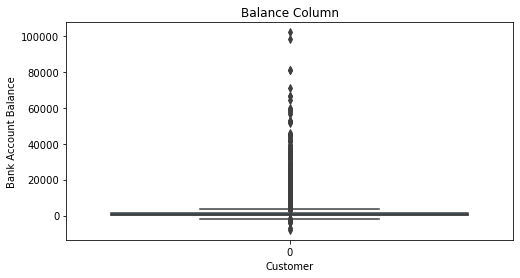

In [11]:
#plot boxplot of balance column
fig = plt.figure(figsize = (8,4))
sns.boxplot(data=bank['balance'])
plt.xlabel('Customer')
plt.ylabel('Bank Account Balance')
plt.title('Balance Column')

plt.show()


In [12]:
#number outliers in balance column 
len(find_outliers(bank, 'balance'))

4729

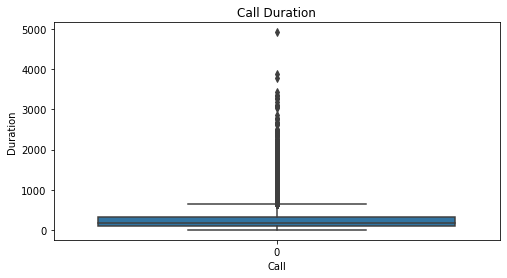

In [13]:
#plot boxplot of duration column 
fig = plt.figure(figsize = (8,4))
sns.boxplot(data=bank['duration'])
#labels
plt.xlabel('Call')
plt.ylabel('Duration')
plt.title('Call Duration')
plt.show()

In [14]:
#number outliers in the duration column 
len(find_outliers(bank, 'duration'))

3235

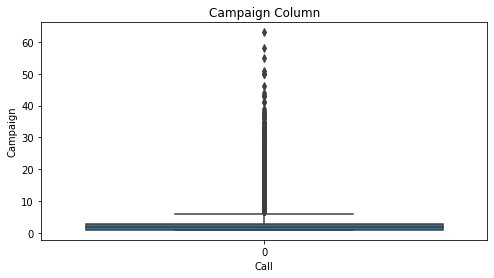

In [15]:
#plot boxplot of campaign column
fig = plt.figure(figsize = (8,4))
sns.boxplot(data=bank['campaign'])
#labels
plt.xlabel('Call')
plt.ylabel('Campaign')
plt.title('Campaign Column')
plt.show()

In [16]:
#number outliers in the campaign column 
len(find_outliers(bank, 'campaign'))

3064

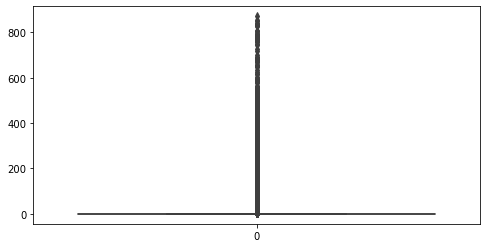

In [17]:
#boxplot of pdays column 
fig = plt.figure(figsize = (8,4))
sns.boxplot(data=bank['pdays'])
plt.show()

In [18]:
#number outliers in the pdays column 
len(find_outliers(bank, 'pdays'))

8257

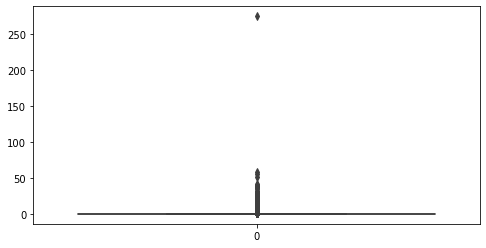

In [19]:
#boxplot of previous column 
fig = plt.figure(figsize = (8,4))
sns.boxplot(data=bank['previous'])
plt.show()

In [20]:
#number outliers in previous column 
len(find_outliers(bank, 'previous'))

8257

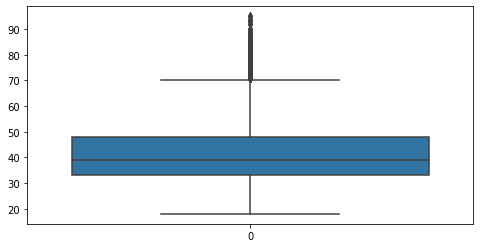

In [21]:
#boxplot of age column
fig = plt.figure(figsize = (8,4))
sns.boxplot(data=bank['age'])
plt.show()

In [22]:
#number outliers in the age column 
len(find_outliers(bank, 'age'))

468

In [23]:
#checking columns to see all the different values used in object type data

#job unique column values
print('Job:', bank['job'].unique())
#marital unique column values
print('Marital:', bank['marital'].unique())
#education unique column values
print('Education:', bank['education'].unique())
#default unique column values 
print('Default:', bank['default'].unique())
#housing unique column values 
print('Housing:', bank['housing'].unique())
#loan unique column values 
print('loan:', bank['loan'].unique())
#contact unique column values 
print('contact:', bank['contact'].unique())
#month unique column values 
print('Month:', bank['month'].unique())
#poutcome unique column values 
print('poutcome:', bank['poutcome'].unique())
#deposit unique column values 
print('Deposit:', bank['deposit'].unique())

Job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Marital: ['married' 'single' 'divorced']
Education: ['tertiary' 'secondary' 'unknown' 'primary']
Default: ['no' 'yes' nan]
Housing: ['yes' 'no']
loan: ['no' 'yes']
contact: ['unknown' nan 'cellular' 'telephone']
Month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome: ['unknown' 'failure' 'other' 'success']
Deposit: ['no' 'yes']


The values in the object columns takes normal values, no sign of any outliers or mistakes in the rows.

## Handling Missing Data

In [24]:
#each columns total missing data 
bank.isna().sum()
#the output shows there is missing values in the columns age, default, and contact

age          1339
job             0
marital         0
education       0
default      1306
balance         0
housing         0
loan            0
contact      1383
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
deposit         0
dtype: int64

#### Age Column

In [25]:
#find the mean for the age column and fill missing data with the mean
bank['age'].fillna(bank['age'].mean(), inplace=True)

#### Default Column

In [26]:
#show all unique values in the default column 
unique_default = bank['default'].unique()
print('Unique Values:', unique_default)
#find the mode 
mode= bank['default'].mode()[0]
print('Default Mode:', mode)

Unique Values: ['no' 'yes' nan]
Default Mode: no


In [27]:
#fill missing values in default column with the mode
bank['default'].fillna(mode, inplace=True)

#### Contact Column

In [28]:
#see all the value options in the contact column
bank['contact'].unique()

#fill missing values with 'unknown' contact option 
bank['contact'].fillna('unknown', inplace=True)

In [29]:
#check to see missing values were resolved
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64